In [ ]:
import sys

MYSITEPACKAGES = "/kaggle/input/dsml-20/"
sys.path.insert(0, MYSITEPACKAGES)
print(sys.path)

In [2]:
!pip install natsort

In [3]:
import os
import sys
from typing import Any
from typing import Dict
from typing import List
from typing import Optional
from typing import Union

import matplotlib as mpl
import matplotlib.pyplot as plt
import natsort
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.display import display, HTML
from IPython.lib import deepreload

import os
import sys

from IPython.lib import deepreload

import kagglelib as kglib

# https://stackoverflow.com/questions/8391411/how-to-block-calls-to-print
class disabled_print:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# https://stackoverflow.com/questions/28101895/reloading-packages-and-their-submodules-recursively-in-python
def reload_kglib() -> None:
    with disabled_print():
        deepreload.reload(kglib, exclude={key for (key, value) in sys.modules.items() if "kagglelib" not in key})

np.set_printoptions(linewidth=200)
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

udf = kglib.load_udf()
uds = kglib.load_role_df(udf, role="Data Scientist")
fdf = kglib.filter_df(udf, print_filters=False)
fds = kglib.load_role_df(fdf, role="Data Scientist")
udf, uds, fdf, fds = map(kglib.keep_demo_cols, (udf, uds, fdf, fds))

# Data: where the truth lies OR # Guitar or Drums?
# State of Machine Learning and Data Science 2020, Revisited

## Table of Contents

1. Methodology
2. Creating a global average salary dataset
2. Exploring "data pollution", spam and user error
3. Data Scientists' Profile
4. Data Scientists' Programming and ML Experience
5. Data Scientists' Salary
6. Conclusion
7. Appendix A: Data cleaning methodology, assumption, datasets
8. Appendix B: Dedicated library and reusable code functions
9. Appendix C: Exploring Q & A; suggestions for future Surveys

## Introduction

The Kaggle DS & ML Survey is an open online survey receiving thousands of responses from all over the world, offering unique insights. This analysis tries to achieve the following goals:

- the identification of spam data, which is a fundamental principal method and goal of Exploratory Data Analysis (EDA).
- examining the profile of Data Scientists with an emphasis on the subject of compensation.

The Kaggle DS & ML Survey being a global online survey is affected by factors that Machine Learning is often used to mitigate: *spam* and *user error*. According to the Survey Methodology, *spam* has already been excluded from the data. Nevertheless, using Exploratory Data Analysis (EDA) we find that a large part of the data should be removed from the dataset for being spam or for having abnormal, irregular values. Using relatively lenient criteria we manage to remove such observations without dropping possible outliers.  

Our analysis comprises the following unique features:

- Filtering the data, which is a principal feature and a goal in itself.
- Comparing the filtered dataset with the Unfiltered one in order to provide additional insights.
- Grouping countries according to the World Bank "Income Groups" definition to account for the wide economic diversity.
- Reconstructing the various classes (bins) in which the data are provided to account for their width and their underlying properties.
- Excluding USA and India from global or group aggregates, thus offering a alternative view on the pronounced symmetric differences.

Combining these features, our results diverge to a large extend from the "Executive Summary", and all other analyses that do not filter the data, especially with respect to our focus, the issue of employees' compensation levels. Our findings add to the understanding of the data, providing information to students, professionals and interested companies in order to optimize their strategical behavior with respect to compensation, relocation and remote work. 

The key findings are:

- There are at least 3861 observations (19.3% of the dataset) than need to filtered out.
- Data Scientists tend to hold, or aim for, higher academic degrees compared to what the unfiltered data shows.
- Median salaries are significantly higher and salary distribution is shifted towards higher ranges. For example, the median salary for Data Scientists in India is double than what the unfiltered data suggest.
- The age distribution density is much higher in younger ages compared to what the unfiltered data shows..
- US-based data scientists are more experienced, while for the same levels of experience, they earn almost double compared to their colleages in other high income countries.
- The Data Scientist's salary increases significantly with Coding and Machine Learning Experience.

The contributions of our work are:

- A fundamentally different methodological framework on the issues of data filtering, observations aggregation and observations decomposition.
- The combination of several economic databases to create a new dataset that proxies the average salary in most countries of the world.
- The creation of a dedicated python library that makes our analysis reproducible, easy to parametrize and allows exploring different dimensions of the dataset using the afore-mentioned methodology.

## FIXME

In Appendix A we discuss in detail our methodology and the datasets we use.

In Appendix B, we provide another distinct result of our exploratory analysis; a concise list of suggestions for future surveys.

## 1. Methodology

### a) Examining Survey questions, answer choices and data

The first part of our EDA is dedicated to exploring abnormal/invalid observation values that have not be flagged as spam by the survey system, but should be definetely removed from the dataset. We use the Kaggle *Executive Summary* as a "benchmark", but our results also differ from all other EDAs that explore the data without filtering them first.

The number of unacceptable values and the criteria that we had to set, highlight the principal importance and challenges of exploring the data for errors and cleaning them before embarking on any other kind of analysis.  Besides unacceptable values, we find mispecifications in "Questions" and "Answer Choices" that may lead to unfounded conclusions.

### b) Adjusting for cross-country economic differences

The importance of meaningful information on compensation levels cannot be understated in a field that transcends national borders like few others.  Nevertheless, the differences among different economies are so profound that a global view on Data Scientist salary distribution shows an "everything goes" result.

Besides calculating a more representative salary median for each country, we group the countries according to the World Bank Income Groups and explore the salary distribution per group of countries. This allows us in turn to explore in a meaningful way the effect that experience levels have on salary in each income group. We find that _experience_ influences salary levels and leads to significant within-group differences.

### c) Reconstruction of data aggregated bins (classes)

The survey uses different classes width for various dimensions (e.g. age, salary and experience).
This is informative and convenient for aggregating observations but comes with a trade-off; a large amount of information is lost.  Unequal bins size leads to "over" or "under" representation of data, depending on the relative width difference and the number of observations.  It may  also distort information and create "illusions" in visual representations. Therefore, we reconstruct bins 
when necessary and gain new and useful information.

### d) USA versus Rest of World (RoW) symmetric difference comparison

When comparing the aggregate metrics of a subset of the data with the overall aggregates we examine whether the subset in question influences heavily the aggregated values.  It is often informative to compare a subset with low number of observations against the total, to asses how it measures against it.  On the contrary, if a subset has substantial weight then information is distorted since the subset affects the total to a significant degree.  In that case, comparing the symmetric difference adds valuable information. Therefore, when comparing the USA, we exclude it from the total.

## 2. Creating a global average salary dataset

In order to examine whether there exist observations with extremely low salary values we had to  assess what consitutes a "low" salary. 

Since the salaries in each country vary significantly we have to use a different threshold value for each country. We initially searched for a comprehensive database containing global data on average salaries per country but couldn't find a public one. Therefore, we combined data from six different sources to obtain an *approximation* for the annual average salary of each country (`country_avg_salary`) and cross-validate our selection.

More specifically, we used:

- the official average salary data from Eurostat for the European Union countries and the United Kingdom (UK).
- the World Bank Gross National Income per capita value (GNI pc), which is the measure used by the World Bank to define country "Income groups" for all the remaining countries.  

We compared these values with:

- the WB Gross Domestic Product per capita (GDB pc).
- the OECD average salary data.
- the International Labour Organizaton (ILO) average salary data.
- unofficial data from "numbeo.com".

The various datasets we examined, the dedicated function and the average salary that we use for setting filtering threshods are shown below. Readers are kindly encouraged to inspect the average salary we select for any country.

In [4]:
dataset = udf
salary_comparison_df = kglib.load_mean_salary_comparison_df()
survey_countries = list(dataset.country.unique())
survey_salary_comparison = salary_comparison_df[salary_comparison_df.country.isin(survey_countries)]
survey_salary_comparison[survey_salary_comparison.country.isin(["USA", "India", "UK", "Brazil", "France", "Germany", "Spain"])]                                  

,country,income_group,eurostat,wb_gni_pc_atlas,wb_gdp_pc,oecd_ppp,ilo,numbeo,country_avg_salary
26,Brazil,2. Upper middle,NaN,9130.0,8717.186278,NaN,8766.0,4215.24,9130
68,France,3. High,40914.646375,42450.0,40493.928572,46480.615399,39699.6,29010.36,40914.6
73,Germany,3. High,58420.771650,48580.0,46445.249101,53637.801603,59108.4,33441.96,58420.8
89,India,1. Lower middle,NaN,2120.0,2099.599048,NaN,NaN,5375.88,2120
179,Spain,3. High,30827.962570,30390.0,29600.378253,38757.569961,28357.2,18931.92,30828
206,UK,3. High,52039.453725,42220.0,42330.117537,47226.087660,36156.0,30416.76,52039.5
207,USA,3. High,NaN,65850.0,65297.517508,65835.577645,50797.2,42706.20,65850


## 3. Exploring "data pollution", spam and user error

The aspects we investigated are:

- Extreme submission time
- Participants who did not actually participate in the survey.
- Participants that are too young for coding or ML experience they reported
- Participants whose salary, experience, age and country of residence are mutually exclusive.
- Criteria based on combinations of age, salary, country and XP

### Extreme Submission time

In [5]:
dataset = udf
seconds = [30, 45, 60, 90]
super_fast_participants = pd.DataFrame(
    {
        "seconds": seconds,
        "fast_participants": [len(dataset[dataset.duration <= sec]) for sec in seconds],
    }, 
)
# super_fast_participants

fastest = dataset.duration.nsmallest(1).values[0]
fastest_time_n = dataset.duration.nsmallest(300).tail(1).values[0]
slowest = dataset.duration.nlargest(1).values[0]
slowest_time_n = dataset.duration.nlargest(300).tail(1).values[0]
# fastest, fastest_time_n, (slowest/3600),  (slowest_time_n/3600)
# 
# (dataset.duration <= 3000).sum()
# dataset[dataset.duration < 3000].duration.hist(bins=200, grid=False)
# dataset.duration.median()
# dataset.duration.mean()

There are 347 participants that completed the survey in less than 60 seconds.  That is arguably not enough time to read (up to) 35 questions.

| threshold (sec) | No. participants |
|-----------------|------------------|
| 30              |  29              |
| 45              | 166              |
| 60              | 347              |
| 90              | 630              |


- The fastest "participation" time is 20 seconds.
- The 300th faster is 56 seconds, meaning that 300 participants "completed" the Survey in 56 seconds or less.  
- The slowest survey completion time is 318 hours (almost two weeks).
- The 300th slowest time is 48 hours, i.e.300 participants "completed" the Survey in more than two days.  

We could try to find a reasonable minimum and maximum duration threshold, but doing so is quite subjective. Furthermore, after applying the rest of our criteria a large part of these extreme values are removed and consequently we chose not to use duration in our filters.

### Participants who did not actually participate in the survey.

In [6]:
# udf.columns[:7].values
orig_df = kglib.load_orig_kaggle_df()
temp_df = orig_df.iloc[:, 7:]

only_answer_demographic = (
    (temp_df == 'None')
    | temp_df.isnull()
).all(axis=1)

#len(orig_df[only_answer_demographic])

The survey dataset includes observations with values answering only demographic questions which do not add any value concerning DS & ML, apart from their interest to participate in a kaggle survey. We drop these observations as irrelevant to the scope of our analysis.

We also investigated dropping observations who gave up to three additional answers, but decided 
to drop those who answered demographic questions plus the next one and then quit the survey.

Using this criterion, we identify and drop 1082 observations. Note that, omitting this criterion does not affect our results with respect to salary levels.

### Participants that are too young for coding or ML experience they reported

Undoubtly, it is impossible to be 24 years old or less and have 20+ years of experience.

Some examples of this criterion are:

In [7]:
dataset = udf
is_too_young_for_experience = (
    (dataset.age <= "24")
    & (dataset.code_exp == "20+")
)
dataset[is_too_young_for_experience].iloc[:,1:8].sample(5, random_state=0)

,age,gender,country,education,role,code_exp,ml_exp
10535,22-24,Man,Brazil,Bachelor’s,Software Engineer,20+,0-1
6147,18-21,Man,Turkey,Bachelor’s,Machine Learning Engineer,20+,0
4103,18-21,Nonbinary,Other,No answer,Currently not employed,20+,NaN
8459,22-24,Man,India,Master’s,Data Scientist,20+,0-1
11462,18-21,Woman,USA,Doctoral,Research Scientist,20+,20+


### Participants whose salary, experience, age and country of residence are mutually exclusive.

As an example, it is impossible to be less than 24 years old and work as an employee (for a salary) and earn above 500,000 usd yearly, in any country in the world.

A closer examination reveals that these particulars participants spam answers extensively:

In [8]:
dataset = udf
too_young_high_salary = dataset[
    (dataset.age <= "24")
    & (dataset.salary.isin(["300000-499999", "500000-999999"]))
].dropna(axis=1).head()
too_young_high_salary.iloc[:,1:11].sample(5, random_state=0)

,age,gender,country,education,role,code_exp,employees,team_ds,company_ml_use,salary
543,18-21,Man,India,Bachelor’s,Data Scientist,0-1,0-49,0,"We have well established ML methods (i.e., mod...",300000-499999
39,18-21,Man,India,Bachelor’s,Data Scientist,3-5,0-49,20+,"We have well established ML methods (i.e., mod...",500000-999999
364,22-24,Man,India,Bachelor’s,Data Scientist,1-2,0-49,1-2,"We recently started using ML methods (i.e., mo...",500000-999999
785,22-24,Man,India,Bachelor’s,Business Analyst,1-2,0-49,0,We are exploring ML methods (and may one day p...,500000-999999
1101,18-21,Self-describe,Other,Doctoral,Other,0,10000+,0,I do not know,500000-999999


Furthermore, we assume that it is impossible to reside in the US, have more than 10 years of experience and earn less than \$1000 USD per year. Such observations are shown in the table below:

In [9]:
dataset = udf
high_exp_bins = ["10-20", "20+"]

is_high_exp = (
    dataset.code_exp.isin(high_exp_bins)
    | dataset.ml_exp.isin(high_exp_bins)
)
# dataset[is_high_exp]

extemely_low_salary_high_exp = (
    (is_high_exp) &
    (dataset.salary_threshold <= 1000)
)
# dataset[is_low_salary_high_exp].dropna(axis=1)

USA_is_low_salary_high_exp = (
    dataset[
        (extemely_low_salary_high_exp)
        & (dataset.country == "USA")
    ].dropna(axis=1).iloc[:, 1:12]
).dropna(axis=0).sample(5, random_state=0)
USA_is_low_salary_high_exp

,age,gender,country,education,role,code_exp,ml_exp,employees,team_ds,company_ml_use,salary
11628,30-34,Man,USA,Master’s,Product/Project Manager,10-20,1-2,10000+,20+,I do not know,0-999
2735,60-69,Man,USA,Doctoral,Statistician,20+,2-3,0-49,0,No (we do not use ML methods),0-999
11051,50-54,No answer,USA,Doctoral,Research Scientist,20+,20+,10000+,20+,"We have well established ML methods (i.e., mod...",0-999
12114,50-54,Man,USA,Master’s,Business Analyst,10-20,4-5,1000-9999,20+,"We have well established ML methods (i.e., mod...",0-999
12621,40-44,Woman,USA,Professional,Other,10-20,0,10000+,20+,We are exploring ML methods (and may one day p...,0-999


### Criteria based on combinations of age, salary, country and XP

We also investigate more advanced conditions using combinations of age, salary, country and experience:

- Too high salary with too low XP.
- Too young for high salary.
- Too low salary.
- Too low salary with too high XP.

For the high salary we set a constant value of \$300,000 for all countries. Any participant that has up to 2 years of Coding or ML experience and earns more that that is filtered out. Similarly, any participant that earns this much and is below 24 years old is dropped.

For the low salary we need to adjust the salary thresholds for each country.

We make the assumption that "in average" the salaries in the Data Science field are higher than the country average and the GNI pc. Nevertheless, in oder to calculate the "too low salary" condition we set a rejection threshold significantly lower than the average salary of each country. More specifically, in order to avoid excluding outliers we set:

- The corresponding `salary_threshold` for each observation, as the upper bound of Kaggle data salary bins.

- The country-adjusted `low_salary_high_exp` threshold, two thresholds below the country average, applicable only for experience values greater or equal to 10 years. 
   
- The country adjusted `too_low_salary` threshold, which we caclulate by multiplying the country average by 0.4 and setting the rejection rate to be two thresholds below the corresponding `salary_threshold`.

By multiplying the country average by 0.4 and setting the relection threshold two thresholds below, we add two extra buffers to account for:

- participants which may not be 100% full-time employeed,
- for possible overestimation of the country average salary on our side,
- and for possible high salary variance in some coutries.

Readers are kindly encouraged to read Appendix A, for a detailed summary of the filering criteria and conditions and to review the submitted code. 

> An important final note is that due to the volume of inaccurate values and spam, the unfiltered data as such should not be used to calculate the average salary because this introduces the significant bias we aim to counter.  

### In the table below we show a sample of the thresholds we calculate.

In [10]:
# kglib.get_threshold(65800, 0)
# kglib.get_threshold(65800 * 1/3, 2)

tresholds_df = kglib.load_thresholds_df()
# tresholds_df[tresholds_df.country == "USA"]
# tresholds_df[tresholds_df.country.isin(survey_countries_list)]

countries = ["USA", "India", "UK", "Brazil", "France", "Germany", "Spain"]
tresholds_df[tresholds_df.country.isin(countries)]

,country,income_group,country_avg_salary,too_low_salary,low_salary_high_exp,high_salary_low_exp
26,Brazil,2. Upper middle,9130,2000,5000,500000
68,France,3. High,40914.6,10000,30000,500000
73,Germany,3. High,58420.8,15000,40000,500000
89,India,1. Lower middle,2120,1000,1000,500000
179,Spain,3. High,30828,7500,25000,500000
206,UK,3. High,52039.5,15000,40000,500000
207,USA,3. High,65850,20000,50000,500000


# 3. Data Scientists Demographic Profile

## No. of participants

In [11]:
pd.DataFrame({
    "dataset": ["Unfiltered", "Filtered", "Unfiltered DS", "Filtered DS"],
    "No. Participants": [len(udf), len(fdf), len(uds), len(fds)],
})

,dataset,No. Participants
0,Unfiltered,20036
1,Filtered,16175
2,Unfiltered DS,2676
3,Filtered DS,2080


## Gender

Men percentage is 1% higher compared to the unfiltered data.

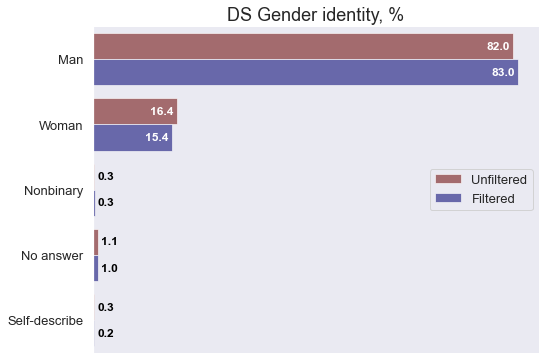

In [12]:
dataset1, dataset2 = uds, fds
column = "gender"
df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    stack_label="No. participants",
    as_percentage=True,
    order=["Man", "Woman", "Nonbinary", "No answer", "Self-describe"],
)
# df

kglib.sns_plot_value_count_comparison(
    df=df,
    width=8,
    height=6,
    orientation="h",
    order_by_labels=False,
    legend_location="center right",
    title="DS Gender identity, %"
)

## Age

Data scientists in the workplace, in the age of 18-21, are not that many after applying the filters. Nevertheless, more than 60% of Data Scientists are below the age of 35.

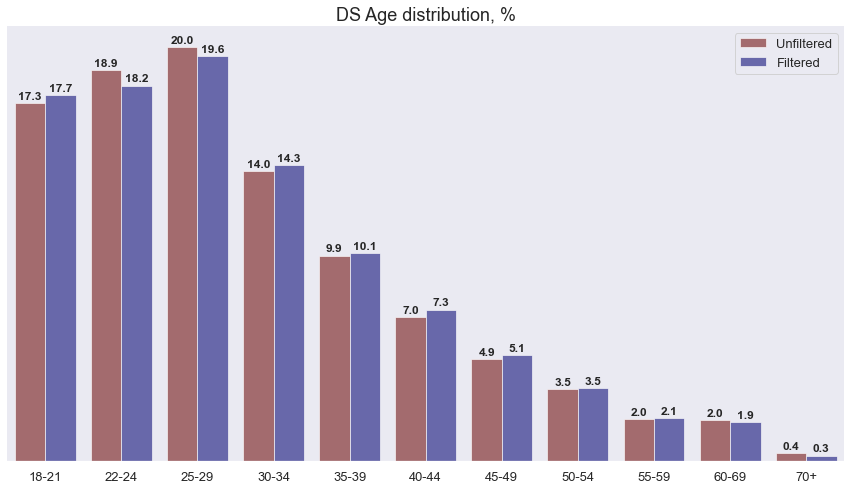

In [13]:
dataset1 = udf
dataset2 = fdf
column = "age"
df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    stack_label="No participants",
    as_percentage=True
)
# df
kglib.sns_plot_value_count_comparison(
    df,
    width=15,
    height=8,
    orientation="v",
    title="DS Age distribution, %"
)

### Examining Survey Age bins

There is something more interesting concerning the whole survey distribution if we examine the bin widths.  

The age bin of `18-21` spans over 4 years, the bin `22-24` over 3 years, and the `25-29` bin spans over 5 years. This ad hoc bin creation is informative if you focus on any of these bins separately, but distorts the comparison between the three. Consequently, the relative size of the `18-21` bin is by definition augmented, while the `22-24` bin is by definition much smaller than the `25-29` bin.

Assumming, for simplicity, that the number of participants per year is constant in bin `18-21` and adjusting the bin widths the distributions changes.

More specifically, by adjusting the bin widths, we find that in the `20-24` cohort there are 30% more participants than in the `25-29` cohort.

Another interesting finding is that the average number of participants per year is higher by 10% in the `18-21` cohort compared to the `25-29` one, showing that Kaggle is way more popular to "newcomers" in Data Science.

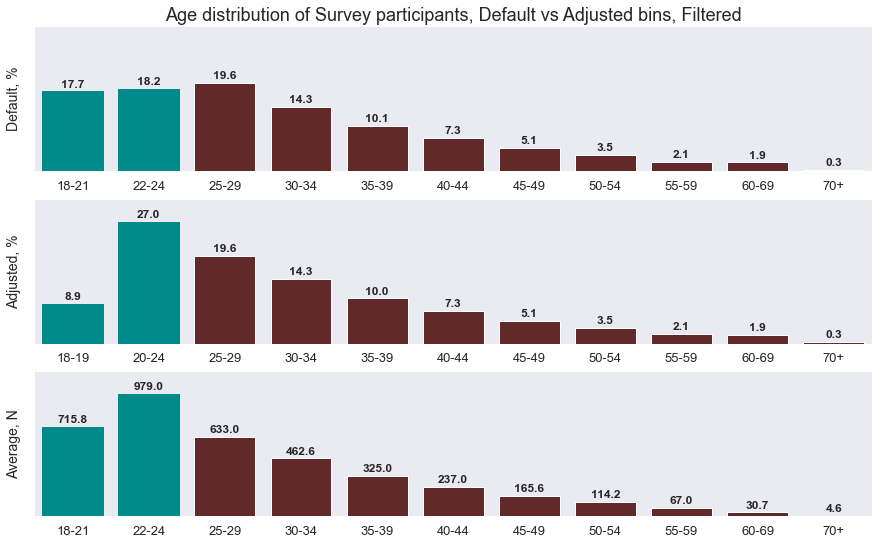

In [14]:
dataset = fdf
kglib.sns_plot_age_distribution(
    dataset,
    width=15,
    height=9,
    title="Age distribution of Survey participants, Default vs Adjusted bins, Filtered"
)

#for unfiltered data we set:
# dataset = udf
# kglib.sns_plot_age_distribution(dataset, width=14, height=8,title="Age distribution of Survey participants, Default vs Adjusted bins, Uniltered data")

## Country

When comparing filtered and unfiltered data:

- The difference between USA and India is less pronounced.
- The UK is third in terms of participants.
- The Netherlands are included in the top 15 countries while Nigeria is not.

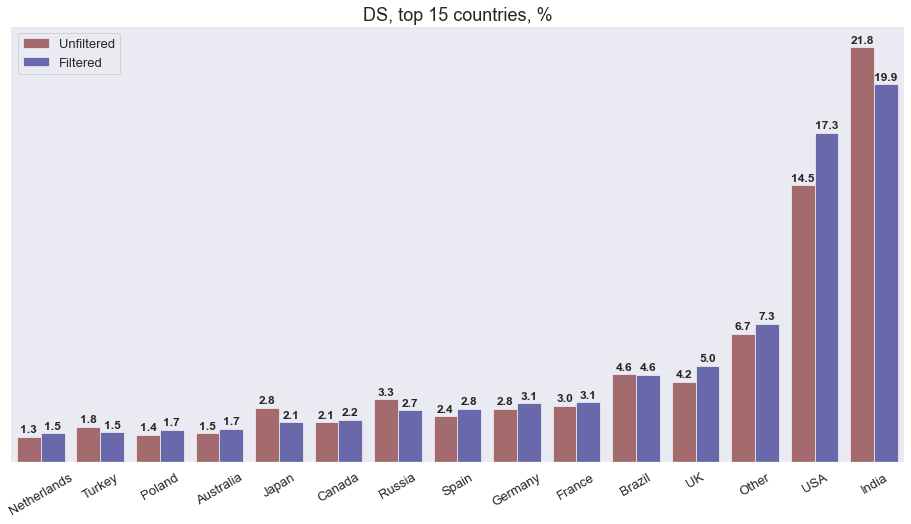

In [15]:
dataset1, dataset2 = uds, fds
column = "country"
df = kglib.get_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    as_percentage=True
)

df = df[df.Filtered > 1.48]
df = df.sort_values(by="Filtered")
df = kglib.stack_value_count_comparison(df, "participants (%)")

kglib.sns_plot_value_count_comparison(
    df,
    width=16,
    height=8,
    orientation="v",
    order_by_labels=False,
    x_ticklabels_rotation=30,
    title="DS, top 15 countries, %"
)

## Education

Interestingly, after filtering the data, "possible" PhD holders increase by more than 13.5%,
reaching the 20% of the total population.  Combined with the fact that the Masters also increase slightly and that Bachelors decrease by around 13% we find that Bachelors and PhD distribution is almost equal. 

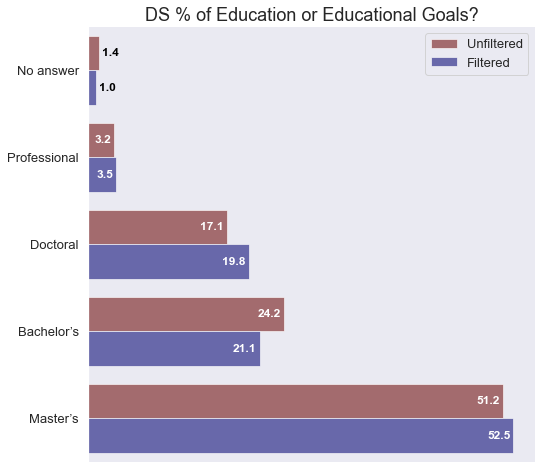

In [16]:
dataset1, dataset2 = uds, fds
column = "education"
order = [
    'No answer',
    'High school'
    'Studies without a degree',
    'Professional',
    'Doctoral',
    'Bachelor’s',
    'Master’s',
]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    stack_label="participants (%)",
    as_percentage=True,
    order=order,
)
# df

kglib.sns_plot_value_count_comparison(
    df,
    width=8,
    height=8,
    orientation="h",
    order_by_labels=False,
    title="DS % of Education or Educational Goals?"
)

#### Examining the questions asked:

There is another important discovery though.

The question about education is posed in a way that does not allow for definite inferences about the current level of education of participants.  

In [17]:
kglib.load_questions_df().iloc[4]

'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

Even if "Data Scientists" are not "Students", we can not be 100% certain whether they replied about the level of education they have already attained or about the one they plan to attain.  

Therefore, we exclude this dimension from our analysis on salaries as any EDA based on information provided by it would be unfounded.

# 4. Data Scientists Programming and ML Experience

### Programming Experience - USA vs RoW

#### Unfiltered dataset

Using the unfiltered data and excluding the US from the global aggregate we find that:  

- The percentage of Data Scientitsts in the US with more than 20 years of Programming Experience is almost triple than in the RoW.
- More than the two thirds of Data Scientists in the US, have more than 5 years of experience.  
- The shortage of experienced data scientist in the RoW is manifested vividly, as more than 60% of Data Scientists in the RoW have less than 5 years of Programming Experience.  

> Ps. There is an error in the "Executive Summary", p.9 plot concerning the USA "20+ years" bin.  
The plot shows 7.6% of participants while the actual unfiltered data value is 17.5%

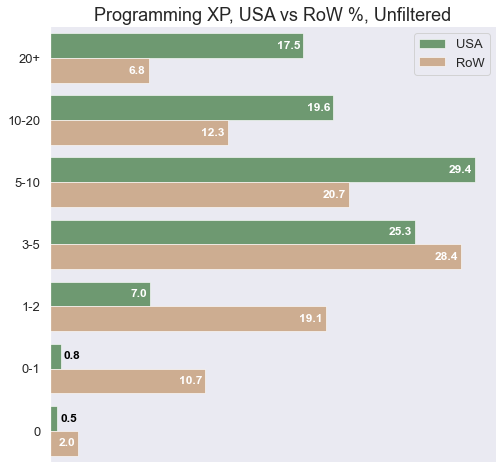

In [18]:
role = "Data Scientist"
country = "USA"
column = "code_exp"
dataset = uds

dataset = kglib.load_role_df(dataset, role=role)
dataset1 = dataset[dataset.country == country]
dataset2 = dataset[dataset.country != country]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    label1=country,
    label2="RoW",
    stack_label="participants (%)",
    as_percentage=True,
    order=natsort.natsorted(dataset[column].unique(), reverse=True)
)

kglib.sns_plot_value_count_comparison(
    df,
    width=8,
    height=8,
    orientation="h",
    order_by_labels=False,
    title=f"Programming XP, {country} vs RoW %, Unfiltered",
    palette=[sns.desaturate("green", 0.75), "peru"],
)

#### Filtered dataset

- The percentage of Data Scientitsts in the US with more than 20 years of Programming Experience is double than in the RoW.

- Similarly to the unfiltered dataset, more than the two thirds of Data Scientists in the US, have more than 5 years of experience.  On the other hand, the shortage of Experienced Data Scientists in the RoW decreases, since more than 50% have less than 5 years of Programming Experience.

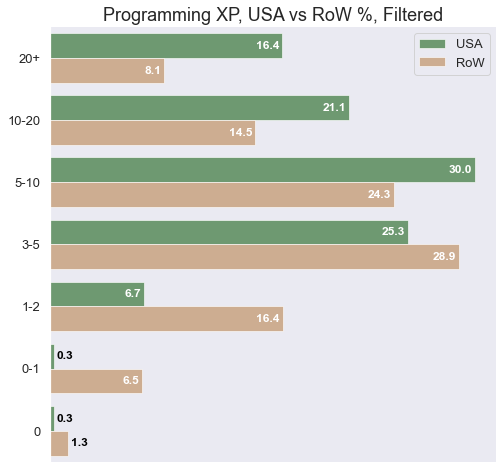

In [19]:
role = "Data Scientist"
country = "USA"
column = "code_exp"
dataset = fds

dataset = kglib.load_role_df(dataset, role=role)
dataset1 = dataset[dataset.country == country]
dataset2 = dataset[dataset.country != country]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    label1=country,
    label2="RoW",
    stack_label="participants (%)",
    as_percentage=True,
    order=natsort.natsorted(dataset[column].unique(), reverse=True)
)

kglib.sns_plot_value_count_comparison(
    df,
    width=8,
    height=8,
    orientation="h",
    order_by_labels=False,
    title=f"Programming XP, {country} vs RoW %, Filtered",
    palette=[sns.desaturate("green", 0.75), "peru"],
)

## Machine learning experience - USA vs RoW

After filtering the data and excuding the USA from the global aggragate, we find that:  

- The relative differences in Data Scientists with experience of more than 10 years is higher compared to the global aggreagares that include the US.

- More than one in three respondents (34.6%) from the US have experience of 10 years or more, versus one in five (20.3%) in the RoW.  

> Ps. There are two errors in the "Executive Summary", p.10 plot.  
> - The bin for "10-15 years" should be "10-20 years".
> - The relative scale for the global bars at the bins of "10-20 years" and "20 or more" has been set to almost zero.

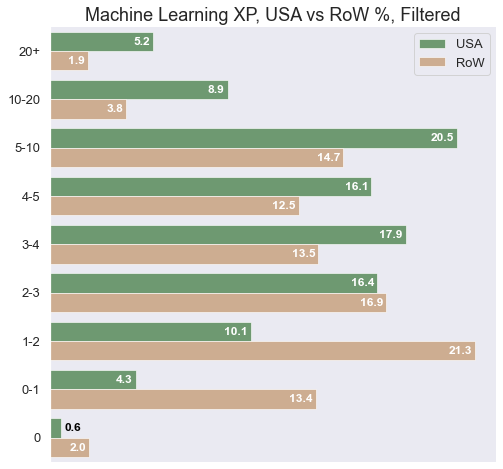

In [20]:
role = "Data Scientist"
country = "USA"
column = "ml_exp"
dataset = fds

dataset = kglib.load_role_df(dataset, role=role)
dataset1 = dataset[dataset.country == country]
dataset2 = dataset[dataset.country != country]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    label1=country,
    label2="RoW",
    stack_label="participants (%)",
    as_percentage=True,
    order=natsort.natsorted(dataset[column].unique(), reverse=True)
)

kglib.sns_plot_value_count_comparison(
    df,
    width=8,
    height=8,
    orientation="h",
    order_by_labels=False,
    title=f"Machine Learning XP, {country} vs RoW %, Filtered",
    palette=[sns.desaturate("green", 0.75), "peru"],
)

Using the unfiltered data but excluding the USA from the global aggregates, we see that: 

- Less than one in 6 respondents have experience of more than 5 years in the RoW (16.3%).  
- There is a relative reduction of around one fourth in the unfiltered versus the filtered data, for the  high experience categories.
- Similarly, only 4.5% of Data Scientists in the ROW have more than 5 years experience in Machine Learning.

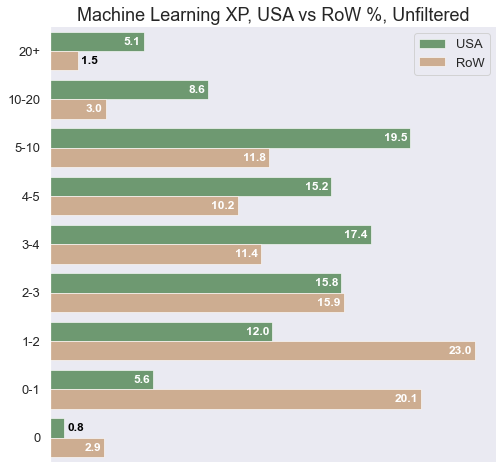

In [21]:
role = "Data Scientist"
country = "USA"
column = "ml_exp"
dataset = uds

dataset = kglib.load_role_df(dataset, role=role)
dataset1 = dataset[dataset.country == country]
dataset2 = dataset[dataset.country != country]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    label1=country,
    label2="RoW",
    stack_label="participants (%)",
    as_percentage=True,
    order=natsort.natsorted(dataset[column].unique(), reverse=True)
)

kglib.sns_plot_value_count_comparison(
    df,
    width=8,
    height=8,
    orientation="h",
    order_by_labels=False,
    title=f"Machine Learning XP, {country} vs RoW %, Unfiltered",
    palette=[sns.desaturate("green", 0.75), "peru"],
)

# 5. Salary

## Global Salary distribution

The unfiltered data global salary distribution exhibits an "anything goes" pattern with three slightly higher density modes which are partly related to unequal bin widths. Note that the `100000-124999` bin width is 2.5 times wider than the `90000-99999` bin width.   Similarly, if we construct equal size bins by joining the `7500-9999` and the `5000-7499` bins, we will get higher values than the `10000-14999` bin. Even worse, what literaly sticks out is the `0-999` bin suggesting that almost one in five Data Scientists globaly earn less than on thousand $USD per year.   

Thankfully, this is related to spam, user-error or, possibly, part-time employement values. The picture is not as bleak after filtering the data. The filtered data global salary distribution values increase significantly, _from 25\% to 30\%_, and the density of the three main modes and of their neighboring bins also increases relative to their unfiltered values.  

The three modes indicate hidden patterns in the data resulting in this distribution shape.   Therefore, we examine the salary distribution:  

- of the countries with the higher number of participants in the Survey (USA, India, UK, Brazil). These countries happen to belong in different World Bank Income groups.
- groups of countries according to the World Bank "Income Group" categories. There were no countries in the "Lower" income group in the data. Some participants from countries belonging to this group, might be have been classified in the "Other" country category. Unfortunately, this information is not available to us.

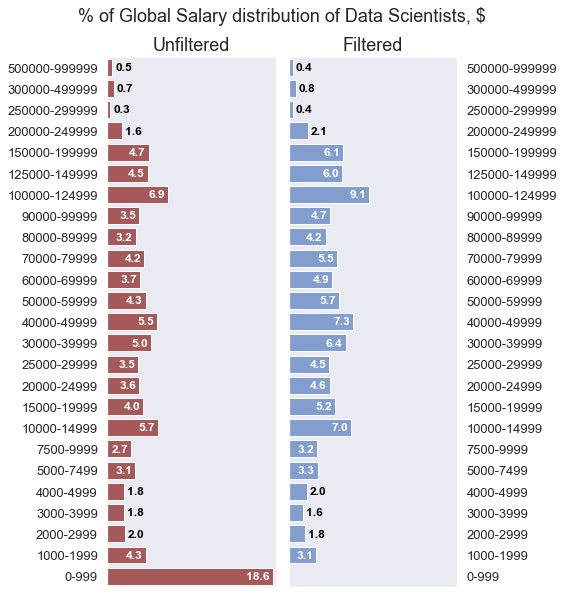

In [22]:
kglib.sns_plot_global_salary_distribution_comparison(
    uds,
    fds,
    width=8, 
    height=8,
    title="% of Global Salary distribution of Data Scientists, $"
)

## US salary distribution

Examining the filtered data, we get a clearer idea about what to expect working as a data scientist in the US.  We should expect, 97% of the times, a minimum staring salary above 70000.  

We find that the US salary distribution is even more concentrated in the 90k to the 200k range. Resembling one standard deviation analysis without calculating the mean, we find that more than 70% of salary observations are in the 90k to the 200k range. The reason we choose the 90-99k bin instead of the 200-249k bin in order to calculate the cumulative percentage of 70% of observations has to do with the relative bin widths as discussed previously.  

If we combine the bins from 70k to 99k, we get a single bin whose value is ~18.3% and with greater width compared to the 100-125k bin.  Similarly, if we split the 150-199k bin in half, we get two bins of the same width and whose values will be ~11.5%. Using this information we conclude that the mode of the distribution lies in the 100-125k bin, while the median lies in the 125-149k bin.

So, even though most of the observations (23%) are in the 150k-199k range this is an optical illusion. This should be noted so that readers get a better understaning of the data.  

Comparing the mode midpoint (112.5k) that we infer by examing the data and the adjusted bins, we find that the mode mid-point is higher by two thirds compared to the US average salary ($68700). Additionally, the median is approximately double than the average salary.

That information should be kept in mind by all interested parties.

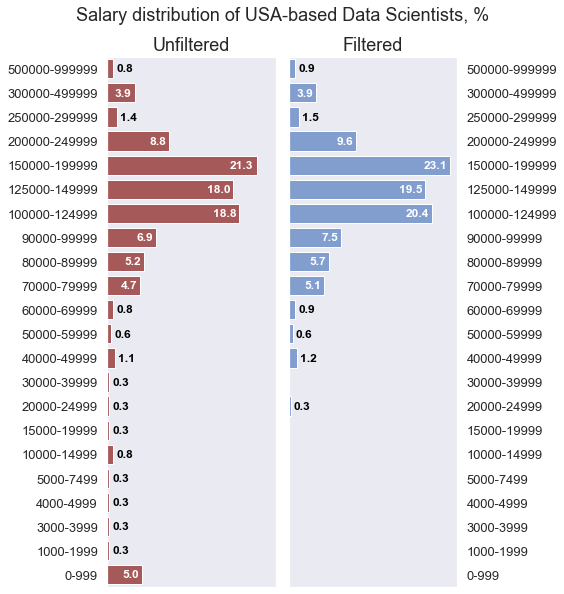

In [23]:
country = "USA"
dataset1 = uds[uds.country == country]
dataset2 = fds[fds.country == country]

kglib.sns_plot_global_salary_distribution_comparison(
    dataset1,
    dataset2,
    width=8,
    height=8,
    x1_limit=(0, 24),
    x2_limit=(0, 24),
    title=f"Salary distribution of {country}-based Data Scientists, %"
)

## 5c. India Salary distribution
Being one fifth of the data we think it is necesary to focus a bit on more on the Salary distibution of India.

Examining the filtered data, we find that the Data Scientists salary distribution in India spreads out along a wider range of values.  
As expected, after excluding data that suggested that one third of Data Scientists earn less than 25% of the country average, we can make more reliable inferences.  
Note that there are no observations in the top salary bins despite setting lenient rejection thresholds.  
This highlights the importance of filtering criteria that amy capture a small part of total data, since the might play an important role when examining subsets.

Taking into account the unequal bin size we can see that 69.3% of the observations are in the 4k-4999 range.  
This resonates with the fact the India is classified by the World Bank as a "Lower Middle" income country.  

When we calculate the cumulative percentages of the distribution, we do not include the 40k-49999 bin. 
Instead, we include the 4k-4999 bin, despite the fact that both bins have similar density.  
We do so because the 40-49999 bin is 10 times wider.  
Simalarly, by examining bin widths, we find that the distribution density mode is at the 5k-9999 area (15.7%) including almost 10% more obsrevations than the 10k-14999 bin.  

Interestingly, the mode bin midpoint (7500) is almost four times larger than the country average salary we use to set the rejection threshold.

This evidence adds support to the general intuition that Data Scentists' salaries are considerably higher than the average country salaries.  
It also indicates that our salary value rejection criteria were lenient indeed.  
As a final note, by examining the filtered data graph, we find evidence that being intentionally lenient, we have allowed for a part of non-normal values to remain in the data in the 1000-1999 bin.  
This also infulences the salary distribution and indicates that it might actually take higher percentage values.  
Pointing out non-normal values should be noted since the identification of such values is a goal in itself in any EDA.

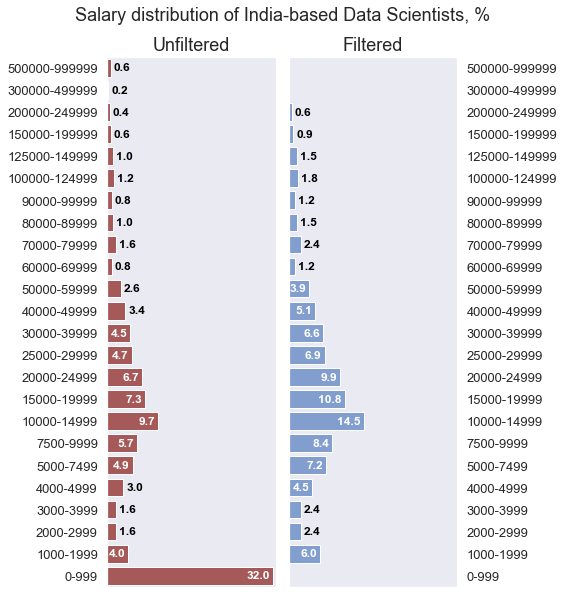

In [24]:
country = "India"
dataset1 = uds[uds.country == country]
dataset2 = fds[fds.country == country]

kglib.sns_plot_global_salary_distribution_comparison(
    dataset1,
    dataset2,
    width=8,
    height=8,
    x1_limit=(0, 32.5),
    x2_limit=(0, 32.5),
    title=f"Salary distribution of {country}-based Data Scientists, %"
)

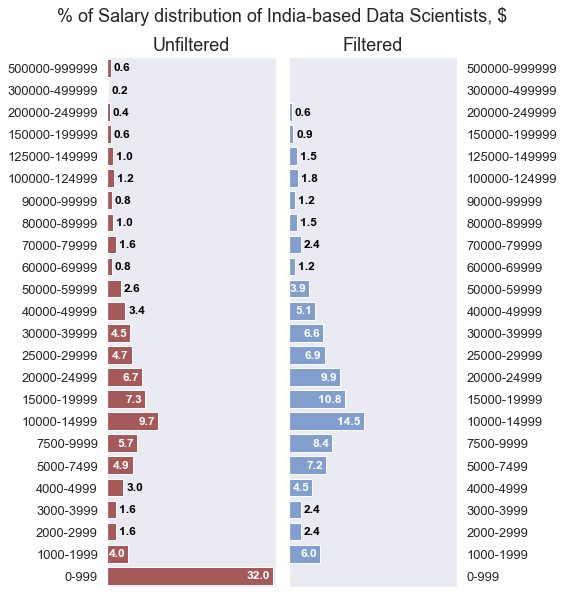

In [25]:
india_uds = uds[uds.country == "India"]
india_fds = fds[fds.country == "India"]

kglib.sns_plot_global_salary_distribution_comparison(
    india_uds, india_fds,
    width=8, height=8,
    x1_limit=(0, 32.5), x2_limit=(0, 32.5),
    title="% of Salary distribution of India-based Data Scientists, $"
)

## 5d. UK salary distribution

The UK salary distribution is also spread out, but a closer look reveals that the 150k-199999 bin sticks out partly due to its relatively large width.  
Still, 36% of values are above the 100k threshold and there is a two-modal pattern in the UK distribution.  
Despite being classified by the World Bank as a "High Income" country, the UK is actually among the top countries in that category in terms of average salary.  
Accounting for experience levels could perhaps explain salary differences more than age or education.

Overall, the UK Data Scientists salary distribution area occupies values much lower compared to the USA.  
This fact, indicates that we should exclude the USA from the group of "High Income" countries when examining the salary distribution of the group.  
We took a similar approach when we examined the experience levels in the USA versus the RoW.  

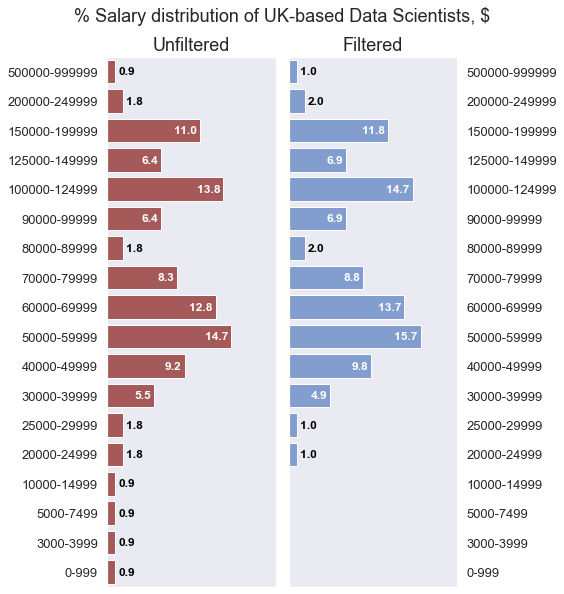

In [26]:
uk_uds = uds[uds.country == "UK"]
uk_fds = fds[fds.country == "UK"]

kglib.sns_plot_global_salary_distribution_comparison(
    uk_uds, uk_fds,
    width=8, height=8,
    x1_limit=(0, 20), x2_limit=(0, 20),
    title="% Salary distribution of UK-based Data Scientists, $"
)

## 5d. Brazil salary distribution

Brazil is classified by the World Bank as an "Upper middle" income country.

The salary distributtion is significantly different than the other three countries we examined.

We see that the majority of observations are in the 10k-59999 range and observation are more evenly distributed in the 10k to 40k range.

The graph indicates that some possible spam and unacceptable values remain in the "2000-2999" and "3000-3999" bins.

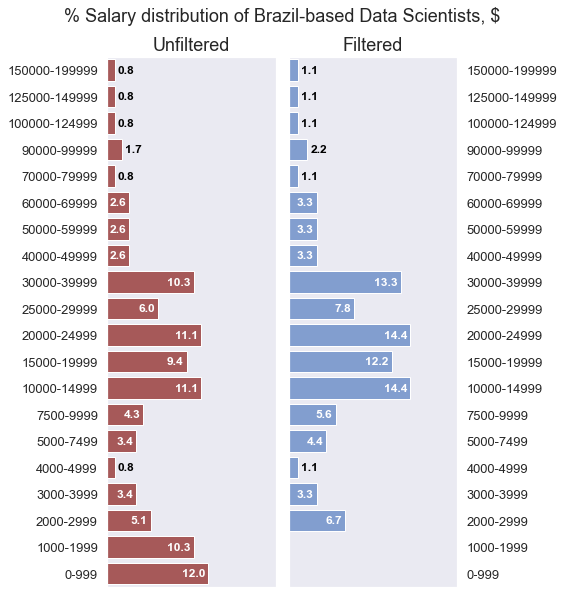

In [27]:
brazil_uds = uds[uds.country == "Brazil"]
brazil_fds = fds[fds.country == "Brazil"]

kglib.sns_plot_global_salary_distribution_comparison(
    brazil_uds, brazil_fds,
    width=8, height=8,
    x1_limit=(0, 20), x2_limit=(0, 20),
    title="% Salary distribution of Brazil-based Data Scientists, $"
)

## 5e. Comparing country Medians

Comparing the median salaries of the filtered versus the unfiltered data we find a significant difference for most countries.  

Taking the bin midpoints, we find that the median salary is higher by:

    44% in Japan,
    22% in France,
    
    and double in Russia, Brazil, India,
   than the unfiltered data suggest.  

This graph confirms the signifiacnt difference between the US and other countries, in terms of Data Scientists salary.  
There results are similar for the whole data set and not only for Data Scientists.

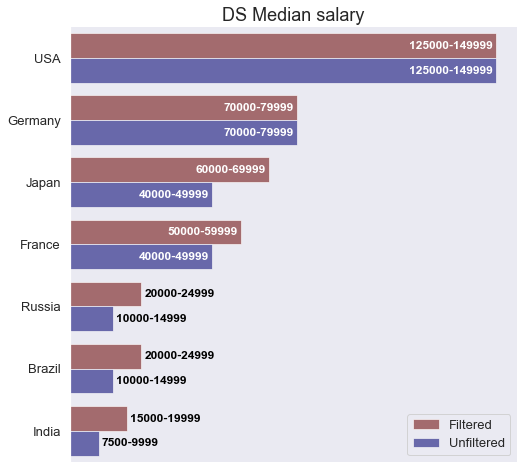

In [28]:
df = kglib.load_salary_medians_df(
    dataset1=uds,
    dataset2=fds,
    label1="Unfiltered",
    label2="Filtered",
    countries = ["USA", "Germany", "Japan", "France", "Russia", "Brazil", "India"],
)

kglib.sns_plot_value_count_comparison(
    df=df, 
    width=8, 
    height=8, 
    orientation="h", 
    order_by_labels=False,
    annotation_mapping=kglib.REVERSE_SALARY_THRESHOLDS,
    title="DS Median salary"
)

## 5f. Salary distributions for country "Income groups"

Since the global salary distribution is so diverse, we group the countries in the data according to the World Bank (WB) "Income group" criteria, in order to examine possible differences in the distribution.  
Please read Appendix A for relevant info on WB "Income Groups".  
As a reminder, the data bins' width in the x-axis is not equal, in fact bins size increases by orders of magnitude.  
We ameliorate this by using logarithmic scale and by adjusting the graph smoothing factor.  

According to the WB definition the Income groups comprises countries with wide income differences.  
For example, the WB "High Income" group definition includes Romania, Portugal, Germany, Switzerland and the USA.

Ploting the salary by country income groups we get an informative decomposition of the distribution, in contrast to the "everything goes" global view.  
We find that the US is a class of its own in the data, taking quite higher values than the rest of the "High Income" countries.  
This is another confirmation that the USA merits a distinct examination and at the same, when making inference about the RoW the USA should be excluded.  
Therefore, the "High Income" group in this graph does not include the USA.  
The graph confirms the USA distribution mode is the one that we infer by examing the bins' width.  

The main area of the "High Income" countries distribution appears to be after the mode of the "Upper Middle" income group but before the USA distribution mode.

The "Upper Middle" countries distribution mode is positioned at the salary level of the mimimun outliers of the "High Income" distribution.  
The left tail is most likely unfiltered spam.

Since India comprises one fifth of the Data Scientists, we examine it separately and exclude it from the "Lower Middle" countries group to assess whether that makes a difference.  
We find that India is somewhere in the middle between "Upper Middle" and "Lowew Middle" countries.  

The "Lower Middle" countries salary levels are ditributed mostly to lower salary bins. The left tail might be related to spam or to countries with very low salary levels.

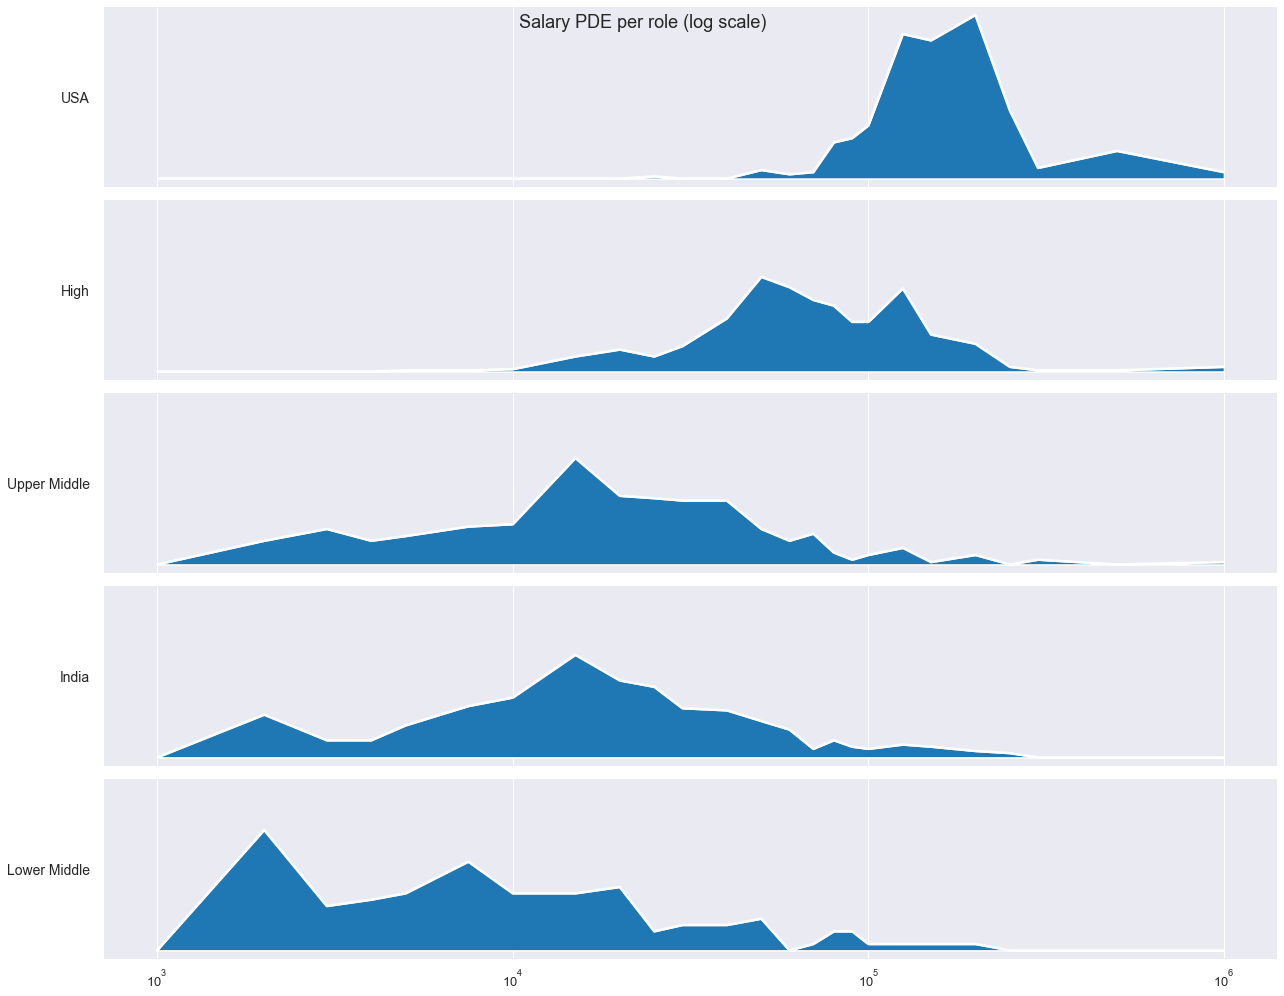

In [29]:
reload_kglib()

dataset = fds

dataset = dataset[~dataset.salary.isna() & ~(dataset.country == "Other")]
usa = dataset[(dataset.country == "USA")].salary_threshold.reset_index(drop=True).rename("USA")
high = dataset[dataset.income_group.str.startswith("3") & (dataset.country != "USA")].salary_threshold.reset_index(drop=True).rename("High")
upper_middle = dataset[dataset.income_group.str.startswith("2")].salary_threshold.reset_index(drop=True).rename("Upper Middle")
india = dataset[(dataset.country == "India")].salary_threshold.reset_index(drop=True).rename("India")
lower_middle = dataset[dataset.income_group.str.startswith("1") & (dataset.country != "India")].salary_threshold.reset_index(drop=True).rename("Lower Middle")

series = (usa, high, upper_middle, india, lower_middle)

kglib.sns_plot_pde_comparison(series,)

## 5g. Salary distributions for Income groups and occupations

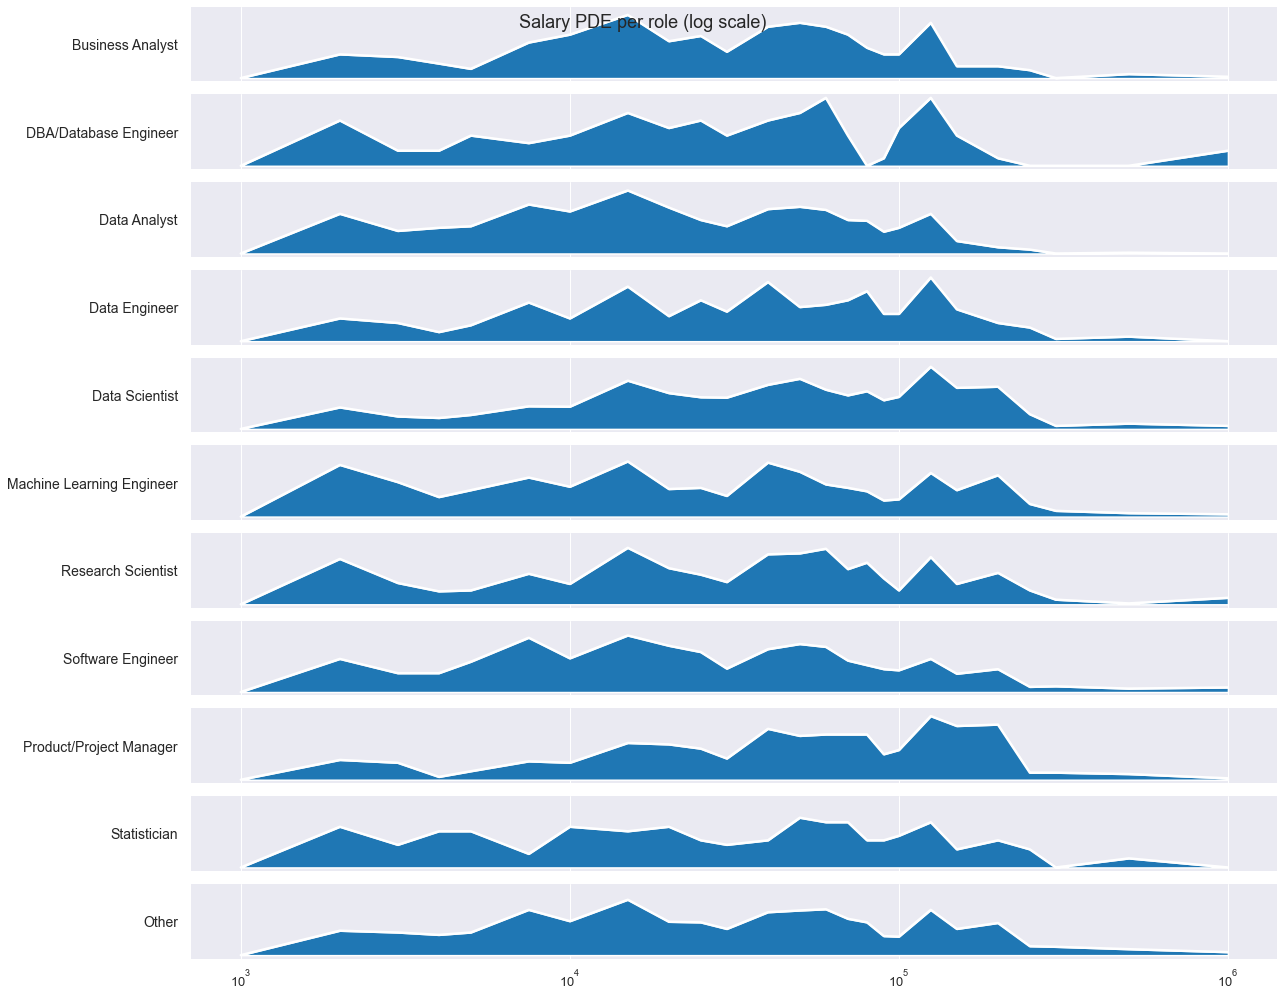

In [30]:
dataset = fdf
roles = [
    "Business Analyst",
    "DBA/Database Engineer",
    "Data Analyst",
    "Data Engineer",
    "Data Scientist",
    "Machine Learning Engineer",
    "Research Scientist",
    "Software Engineer",
    "Product/Project Manager",
    "Statistician",
    "Other",
]
series = list(map(lambda role: dataset[dataset.role == role].salary_threshold.dropna().reset_index(drop=True).rename(role), roles))
kglib.sns_plot_pde_comparison(series)

# WIP from here , IGNORE

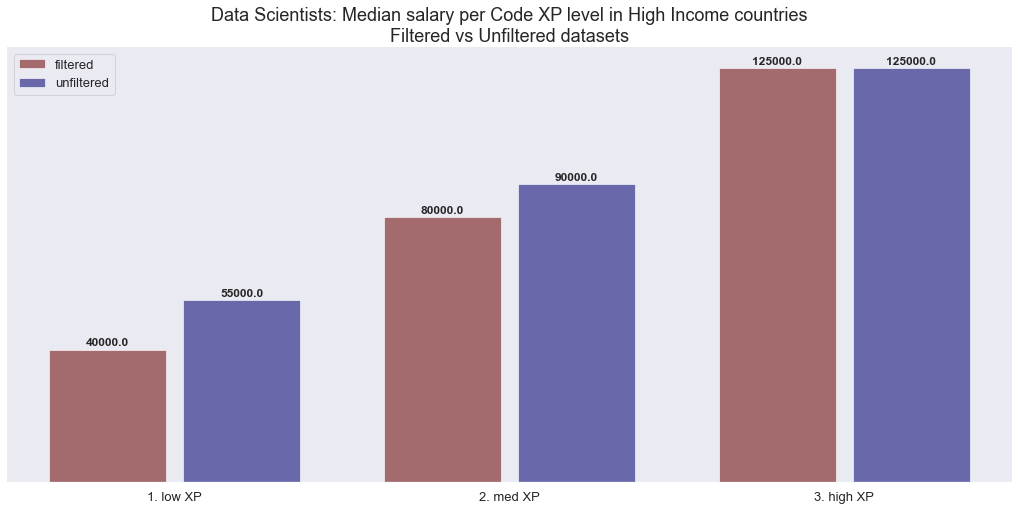

In [31]:
kglib.load_median_salary_per_income_group_per_XP_level_df(uds, xp_type="code", income_group="3")
kglib.load_median_salary_per_income_group_per_XP_level_df(uds, xp_type="ml", income_group="3")
kglib.load_median_salary_per_income_group_per_XP_level_df(uds, xp_type="ml")

df = kglib.load_median_salary_comparison_df(uds, fds, xp_type="code", income_group="3")
kglib.sns_plot_value_count_comparison(df, height=8, width=18, bar_width=0.35, title_wrap_length=80, title="Data Scientists: Median salary per Code XP level in High Income countries Filtered vs Unfiltered datasets")

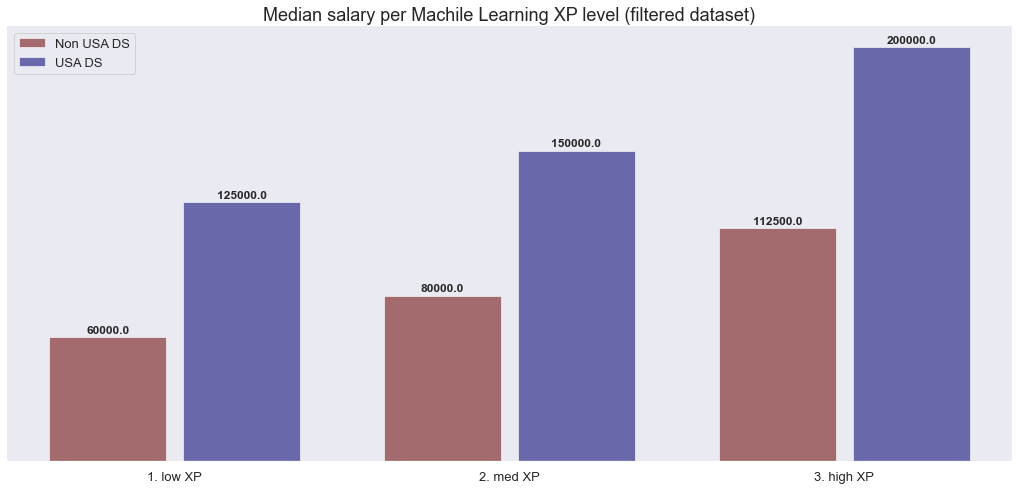

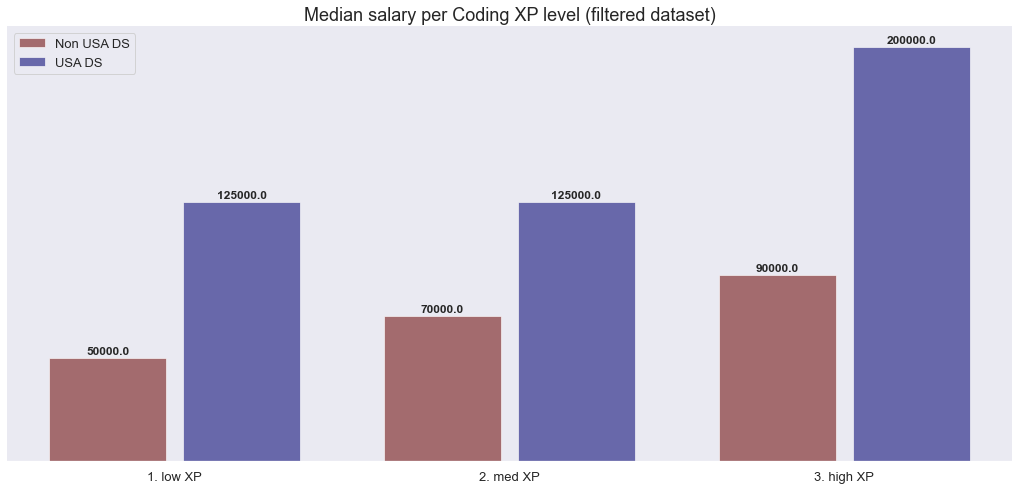

In [32]:
fds_usa = fds[fds.country == "USA"]
fds_non_usa = fds[fds.country != "USA"]

reload_kglib()
df = kglib.load_median_salary_comparison_df(fds_non_usa, fds_usa, xp_type="ml", income_group="3", label1="Non USA DS", label2="USA DS")
kglib.sns_plot_value_count_comparison(
    df, height=8, width=18, bar_width=0.35, title_wrap_length=70, 
    title="Median salary per Machile Learning XP level (filtered dataset)"
)

df = kglib.load_median_salary_comparison_df(fds_non_usa, fds_usa, xp_type="code", income_group="3", label1="Non USA DS", label2="USA DS")
kglib.sns_plot_value_count_comparison(
    df, height=8, width=18, bar_width=0.35, title_wrap_length=70, 
    title="Median salary per Coding XP level (filtered dataset)"
)

## Appendix A: Data cleaning methodology, assumption, datasets, functions


### a) Filtering tolerance


The first thing that sticks out besides the Survey "completion" time is the large number of observations with salary value in the 0-999 bin.  

As a general rule for this analysis, we intentionally set lenient criteria for rejecting "spam" or "unacceptable values for two reasons:

    a) In order to not lose information about an arguably high variance dataset, we aim to avoid dropping outliers that could be falsely indetified as spam, i.e. we want minimum, or even better, zero false "spam" (False Positives). 
    This implies that we allow observations that should be dropped to remain in the data, i.e we allow for false Negatives (classified as not spam, despite being spam).  
    This rule that intentionaally sacrifices accuracy for retaining valuable information, is mainly selected for reason b).  
    
    b) Our method, analysis and results are unique and diverge significantly with the official "Executive Summary" and all other EDAs that do not filter the data.  
    Therefore, setting very lenient spam identification criteria we are able to demonstrate without doubt that we don't "cook the data" to make a higher impact.
    Spam and irregular values are so extensive in the data that one is tempted to drop more than one fourth of the dataset.  
    Nevertheless, we demonstrate the validity of our analysis, using very lenient criteria, despite plenty of evidence that we could be more strict.  
    For those who would like to see the results of using moderate or stricter criteria, we have created configurable dedicated functions that can be used to run all possible scenaria.


### b) Straighfoward rejection conditions and criteria.


Starting from "question zero", we examine the time that it took participants to complete the survey.

Checking duration to complete and number of questions answered, we identified hundreds of observations that completed the survey in less than 30 seconds.  
It is impossible to complete a survey of this length in 30 seconds, not even to read the questions asked.  

Conclusion 1: the spam system method includes participants which did not actually complete the Survey or provided random  answers as fast as possible. Instead of choosing a reasonable minimum and maximum duration thresholds, we select other qualitative criteria, and we manage to filter out a large part of these observations.

#### Criterion b1. Participants who did not actually participate in the survey.


This includes observations with values only for the first set of general demographic questions and no other relevant information that adds any value concerning DS & ML.  
We drop these irrelevant observation values as they do not provide further information relative to the scope of the survey.  
We could also add a threshold for minimum 3 Not-Nan values, but being lenient, we merely drop those who only answered demographic questions, plus the next one and then quit the survey.

Using our first criterion, we identify and drop 1082 observations.  
Note that, not using criterion 1 does not affect our main results with respect to salary levels at all.


### Criterion b2. Participants that are too young for their experience (in Programming or Machine Learning)

it is impossible to be 24 years old or less and have 20+ years of experience.it is impossible to be 24 years old or less and have 20+ years of experience.



Age VS Salary


### Criterion 3: Participants whose salary, experience, age and country of residence are mutually exclusive.

As an example, it argue that is impossible to be 24 years old or less, working as an employee (for a salary) and earn above 500,000 usd yearly, in any country in the world.
### c) Salary data, assumptions and general scope.
  
To set a reliable salary cut-off threshold in order to evaluate observations values we use a step by step approach in which we set buffers to avoid dropping possible outliers. 

Undoubtly, an average salary comprises a range of values that fluctuate for a number of reasons, related to age, experience, cross-sectoral and within-sectoral differences, geographical differences within the same country and generally related to a whole range of factors that are beyond our scope to examine.  
Additionally, the country average salary, GNI per capita and GDP per capita may me skewed towards higher values, for states with small total population and developed high-salary sectors.  
On the other hand, for countries with very large population, in the lower incomer category and high percentages of unskilled labor, the national aggregates may be biased heavily towards smaller values.  This effect add spam tolerance to aour method and we alow for it by design.
Our goal is not to a estimate the average salary of countries in the Survey, but to set a lenient threshold with respect to Data Scientists and other occupations in the Survey, in order to clean the data and describe them afterwards.

Therefore, we combine a comprehensive set of data sources to obtain an approximation for the annual average salary for each country ("country_avg_salary").  
To counter data inavailabilty and benchmark our selection, we combine 6 different datasets.

    * For countries in the European Union, we [use Eurostat data.](https://ec.europa.eu/eurostat/databrowser/view/EARN_NT_NET__custom_414315/default/table?lang=en)  
Specifically, we use "Gross Annual Earnings of single person, without children earning 100% of the average earning, 2019, euro".  
We upload the whole eurostat dataset which comprises of fractions of average salary earnings. We use "Sheet 8".  
The other candidate series are the "Total" and "Net" earnings.  
The more relevant choice is "Gross Earnings".
For a detailed account on Eurostat definitions please visit the official Eurostat [site.](https://ec.europa.eu/eurostat/cache/metadata/en/earn_net_esms.htm)

    We have filtered other information columns and changed country names to align them across all other datasets for coding convenience.  
    Since the question is about current yearly salary in US dollars, we convert euro values to USD, using the average 2019 exchange USD to EUR rate from the European Central Bank (ECB).  
    We provide the relevant ECB file as well.

    * For all the remaining countries, we use the "World Bank Gross National Income per capita, current USD" series, which is the measure used by the World Bank to define country "Income groups".  
     
We compare the selected average salary with the WB Gross National Product per capita (GNI pc), with OECD average salary data, which are reported in Purchasin Power Parity units, International Labour Organizaton average salary data and with unofficial "numbeo" data.  
Due to lack of available data in International Organizations for Taiwan, we made a sinlge exception and used numbeo data.

While it is expected that "in average" the salaries of occupation in this survey will be higher than the country average and the GNI pc, we intenionally do not adjust the salary threshold upwards but downwards to a considerable degree.

We point out that this substituting GNI pc for salary data may not be a close approximation in all cases, therefore we adjust our thresholds considerably lower.  
  
Additionally, data (official or not) should be examined with caution and should not be taken as undeniable facts.  
Not to forget, an average is as accurate as, you know, an average.  
While it is expected that "in average" the salaries of occupation in this survey will be higher than the country average or the GNI pc, we intenionally do not adjust the salary threshold upwards but downwards to a considerable degree.

We did not filter observations for which we could not obtain an approximation for the average salary, e.g. county "Other". 

Readers are kindly encouraged to read Appendix A, for a detailed discussion of the datasets, the method we apply and other possible alternatives.  

An important final note is that due to the volume of inaccurate values and spam, the unfiltered data as such should not be used to calculate the average salary because this introduces the significant bias we aim to counter.

Concering OECD data in PPP units, besides the USA which acts as a benchmark, for other countries this result in over or undee estimation of the average salary depending on the country price level.  
For countries with higher price levels than the USA, the PPP OECD reported values are lower than the actual current nominal salary.  
Conversely, for countries with lower price than the USA price levels, the PPP OECD reported values are higher than the actual current nominal salary.  
The only OECD country not in the WB "High Income" group is Mexico.  
For Iran, WB data still report the 2018 value.  
Taiwan is a country for which there are no data available in the International Organizations that we examined.  
We chose numbeo data for Taiwan and we would like to hear your view on the selected average salary with respect to Data Scientists or other survey related occupations.



### d) Steps by step summary of rejection thresholds setting.

#### Extensive examples of filtering by salary, age, experience and country:

After selecting an average salary approximation, to avoid excluding outliers we set:

* i) the corresponding "salary_threshold" for each observation, as the upper bound of Kaggle data salary bins.
    
    E.g. for a salary value in the "4000-4999" bin the salary threshold we set is "5000".

* ii) the country adjusted "low_salary_high_exp" threshold, two thresholds below the country average, applicable only for experience value >= 10 years.
    
    E.g. for USA, average country salary is 65835, the bin threshold is "60000-70000" and the bin upper bound is 70000.  
    So for participants from USA, with 10 or more years of experience, the "low_salary_high_experience" treshold is 50000.  
    Accordingly, the rejection criterion drops values which are below the upper bin bound of 50000 (in the "40000-49999" range).  
    In simple terms, for high experience, we drop observations with salary which are two thresholds below the country average salary upper threshold.
   
* iii) the country adjusted "too_low_salary" threshold. We multiply the country average by 0.33 and set the rejection rate to be two thresholds below.  
    
    E.g. for USA residents the average country salary is 65800 and 1/3 of the country average salary is 21945, which is in the "20000-29999" bin.  
    Accordingly, the upper theshold is 30000 and the rejection criterion is applied for values two thresholds below, in the range of "10000-14999".  
    In short, the "too low salary" rejection criterion drops values two thresholds below the threshold of the one third of the country average.

* iv) the "high_salary_low_exp" threshold, which is above 300000 for all countries.

    We argue that no one with zero or minimum experience is paid for working as a Data Scientist such a salary.

We point out that substituting GNI pc for salary data may not be a close approximation in all cases, therefore we adjust our thresholds considerably lower.

Our goal is not to a estimate the average salary of countries in the Survey, but to set a threshold with respect to Data Scientists and other occupations in the Survey, in order to clean the data and describe them afterwards.  

Additionally, data (official or not) should be examined with caution and should not be taken as undeniable facts.  
Not to forget, an average is as accurate as, you know, an average.  
While it is expected that "in average" the salaries of occupation in this survey will be higher than the country average or the GNI pc, we intenionally do not adjust the salary threshold upwards but downwards to a considerable degree.

We did not filter observations for which we could not obtain an approximation for the average salary, e.g. county "Other". 

## Appendix B. Setting arguments in the filtering function and related data exploraton functions.

As mentioned above, the data are filtered using a dedicated function that can be reparameterized on the spot by setting:

- a stricter (higher) or more lenient (lower) value for the "low_salary_percentage" argument,
- a different value in the "threshold_offset" argument,
- by adjusting what is considered to be high or low experience.

# Appendix B: Data Analysis driven suggestions for future Kaggle Surveys.

    1. Set a mimimum time rejection limit and a maximum "timeout" limit.
    2. Request Age input as integer values.
    3. Education titles. Ask a separate question about current obtained title.
    4. Education current studies. Ask separately about current studies to "Students" only.
    5. Education, future plans. If that is important for the scope of the Survey ask it separately.
    4. If employeed first ask about full or part-time employment.
    5. Request Monthly instead of Yearly salary and provide hints to participants.
    6. Request Salary input as integer values
    7. This is not always True: Non-professionals were defined as students, unemployed, and respondents that have never spent any money in the cloud.